In [ ]:
import numpy as np
import sys
import os
import warnings
warnings.filterwarnings('ignore')


from sklearn import model_selection
from scipy.stats import chi2_contingency

from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve, auc

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
df = pd.read_csv("df_cleaned.csv", encoding= "unicode_escape")
df.head()

,age,income_level,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,payment_methods_high_risk,max_balance,avg_balance_last_12months,...,multiple_applications_short_time_period,unusual_submission_pattern,applications_submitted_during_odd_hours,watchlist_blacklist_flag,public_records_flag,location_encoded,occupation_encoded,days_since_recent_trade,time_between_account_open_and_trade,credit_history_length
0,56,40099,424.000000,108,1,10,3.139572,0,18209.383136,4324.930673,...,1,1,0,0,1,0.254848,0.256207,268,119,2004
1,69,2050,483.000000,0,0,1,1.017489,0,33673.696504,21726.593916,...,0,1,0,0,0,0.285933,0.266010,307,504,326
2,46,71936,566.000000,0,0,1,1.508626,0,101918.174202,63930.102255,...,0,0,0,0,0,0.264368,0.266010,58,1544,160
3,32,15833,491.513037,97,1,5,2.995150,0,9055.101659,3033.403742,...,0,1,1,0,0,0.241167,0.266965,47,62,396
4,60,8574,787.000000,0,0,1,1.182380,0,91682.852040,77457.387016,...,1,0,1,0,0,0.241167,0.221757,89,37,664


In [ ]:
df.shape

(7000, 23)

In [ ]:
list(enumerate(df.columns))

[(0, 'age'),
 (1, 'income_level'),
 (2, 'fico_score'),
 (3, 'delinquency_status'),
 (4, 'charge_off_status'),
 (5, 'number_of_credit_applications'),
 (6, 'debt_to_income_ratio'),
 (7, 'payment_methods_high_risk'),
 (8, 'max_balance'),
 (9, 'avg_balance_last_12months'),
 (10, 'number_of_delinquent_accounts'),
 (11, 'number_of_defaulted_accounts'),
 (12, 'new_accounts_opened_last_12months'),
 (13, 'multiple_applications_short_time_period'),
 (14, 'unusual_submission_pattern'),
 (15, 'applications_submitted_during_odd_hours'),
 (16, 'watchlist_blacklist_flag'),
 (17, 'public_records_flag'),
 (18, 'location_encoded'),
 (19, 'occupation_encoded'),
 (20, 'days_since_recent_trade'),
 (21, 'time_between_account_open_and_trade'),
 (22, 'credit_history_length')]

In [ ]:
df.describe()

,age,income_level,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,payment_methods_high_risk,max_balance,avg_balance_last_12months,...,multiple_applications_short_time_period,unusual_submission_pattern,applications_submitted_during_odd_hours,watchlist_blacklist_flag,public_records_flag,location_encoded,occupation_encoded,days_since_recent_trade,time_between_account_open_and_trade,credit_history_length
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,46.208857,23739.063714,616.427608,25.226714,0.261000,1.813000,1.477630,0.236714,50337.829377,33638.208194,...,0.259000,0.311143,0.314286,0.125714,0.201857,0.261000,0.261000,218.190000,735.118857,1633.746143
std,16.401828,21846.844041,131.826946,42.709195,0.439211,1.934719,0.687469,0.425096,49507.198629,21792.667523,...,0.438117,0.462994,0.464264,0.331551,0.401415,0.014376,0.012743,105.997341,534.808469,1056.036318
min,18.000000,2000.000000,152.000000,0.000000,0.000000,1.000000,0.438413,0.000000,930.516529,457.869809,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.241167,0.221757,37.000000,-350.000000,-345.000000
25%,32.000000,6927.250000,520.000000,0.000000,0.000000,1.000000,1.052709,0.000000,25496.283316,14259.754378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.246537,0.256207,125.000000,286.750000,731.000000
50%,46.000000,15014.000000,637.000000,0.000000,0.000000,1.000000,1.320565,0.000000,44679.410787,32461.519740,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.257703,0.261728,219.000000,741.000000,1629.000000
75%,61.000000,38299.750000,720.250000,29.000000,1.000000,1.000000,1.720369,0.000000,70157.462957,50897.563246,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.264993,0.269448,308.250000,1186.250000,2547.000000
max,74.000000,99957.000000,943.000000,119.000000,1.000000,10.000000,9.975930,1.000000,999922.083300,92117.793445,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.285933,0.280840,402.000000,1817.000000,3630.000000


In [ ]:
df.skew(axis = 0, skipna = True)

,0
age,-0.009582
income_level,1.180633
fico_score,-0.410773
delinquency_status,1.287916
charge_off_status,1.088625
number_of_credit_applications,2.761067
debt_to_income_ratio,3.695496
payment_methods_high_risk,1.239066
max_balance,11.345942
avg_balance_last_12months,0.412637


In [ ]:
df_backup = df.copy()

### Split train test sets

In [ ]:
X = df.drop(columns=["charge_off_status"])
y = df["charge_off_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
print("Dimensionality of X_train:", X_train.shape)
print("Dimensionality of y_train:", y_train.shape)
print("Dimensionality of X_test:", X_test.shape)
print("Dimensionality of y_test:", y_test.shape)

Dimensionality of X_train: (5600, 22)
Dimensionality of y_train: (5600,)
Dimensionality of X_test: (1400, 22)
Dimensionality of y_test: (1400,)


In [ ]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

### SMOTE - to balance data

In [ ]:
smote = SMOTE(random_state=28)
X_resampled_train, y_resampled_train = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(np.unique(y_train, return_counts=True))
print("After SMOTE:")
print(np.unique(y_resampled_train, return_counts=True))

X_resampled_train = pd.DataFrame(X_resampled_train)
y_resampled_train = pd.DataFrame(y_resampled_train)

Before SMOTE:
(array([0, 1]), array([4132, 1468]))
After SMOTE:
(array([0, 1]), array([4132, 4132]))


## Fitted on og unbalanced data

**Logistic Regression**

In [ ]:
lr = LogisticRegression(random_state=32)
result = lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  86.21 %
Misclassification rate of this model:  13.79 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.883     0.939     0.910      1041
           1      0.782     0.641     0.704       359

    accuracy                          0.862      1400
   macro avg      0.833     0.790     0.807      1400
weighted avg      0.857     0.862     0.857      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  977 |                   64 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  129 |                  230 |
+-----------------+----------------------+----------------------+


**Decision tree**

In [ ]:
dt = DecisionTreeClassifier(random_state=32)
param_grid = {
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1,error_score='raise',scoring='accuracy')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

print(grid_search.best_score_)

{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}
0.8496428571428571


In [ ]:
print("Decision tree \n(fitted on og data)\n")
dtree = DecisionTreeClassifier(max_depth = 5,  min_samples_split = 2, min_samples_leaf = 3, max_features = 'sqrt', random_state = 32)
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred_dtree)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_dtree)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_dtree, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_dtree)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Decision tree 
(fitted on og data)

Accuracy score of this model:  85.29 %
Misclassification rate of this model:  14.71 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.883     0.924     0.903      1041
           1      0.746     0.646     0.693       359

    accuracy                          0.853      1400
   macro avg      0.815     0.785     0.798      1400
weighted avg      0.848     0.853     0.849      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  962 |                   79 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  127 |                  232 |
+-----------------+----------------------+----------------------+


In [ ]:
#feature importances
feature_importances = dtree.feature_importances_

importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

                                    Feature  Importance
8                 avg_balance_last_12months    0.463084
4             number_of_credit_applications    0.166860
9             number_of_delinquent_accounts    0.149579
3                        delinquency_status    0.071458
13               unusual_submission_pattern    0.050563
10             number_of_defaulted_accounts    0.033871
6                 payment_methods_high_risk    0.027221
5                      debt_to_income_ratio    0.009021
16                      public_records_flag    0.005425
20      time_between_account_open_and_trade    0.004839
0                                       age    0.004149
7                               max_balance    0.003579
2                                fico_score    0.003411
1                              income_level    0.002409
17                         location_encoded    0.002380
19                  days_since_recent_trade    0.002151
12  multiple_applications_short_time_period    0

**Random Forest**

In [ ]:
np.random.seed(32)

rf = RandomForestClassifier(random_state=28)
param_grid = {
    'n_estimators': [50, 70, 90, 100, 150],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1,scoring='accuracy')

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

print(grid_search.best_score_)

{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
0.8676785714285714


In [ ]:
print("Random forest fitted on og data\n")

rf_new = RandomForestClassifier(n_estimators=100, max_depth=5, max_features='sqrt', min_samples_leaf=1, min_samples_split=3, random_state=32)
rf_new.fit(X_train,y_train)
y_pred_rf = rf_new.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred_rf)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_rf)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_rf, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Random forest fitted on og data

Accuracy score of this model:  86.86 %
Misclassification rate of this model:  13.14 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.890     0.939     0.914      1041
           1      0.791     0.663     0.721       359

    accuracy                          0.869      1400
   macro avg      0.840     0.801     0.818      1400
weighted avg      0.864     0.869     0.865      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  978 |                   63 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  121 |                  238 |
+-----------------+----------------------+----------------------+


In [ ]:
feature_importances = rf_new.feature_importances_

importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

                                    Feature  Importance
3                        delinquency_status    0.278162
4             number_of_credit_applications    0.183464
10             number_of_defaulted_accounts    0.126009
8                 avg_balance_last_12months    0.100580
2                                fico_score    0.065237
9             number_of_delinquent_accounts    0.064629
6                 payment_methods_high_risk    0.037348
11        new_accounts_opened_last_12months    0.033371
7                               max_balance    0.024470
5                      debt_to_income_ratio    0.021478
13               unusual_submission_pattern    0.020385
12  multiple_applications_short_time_period    0.009845
19                  days_since_recent_trade    0.005950
20      time_between_account_open_and_trade    0.005492
1                              income_level    0.005272
21                    credit_history_length    0.004488
0                                       age    0

**Support Vector Machine**

In [ ]:
g = [0.0001, 0.001, 0.01, 0.1]
hist = []
for val in g:
    clf = SVC(gamma=val)
    cross_val = cross_val_score(clf, X_train, y_train, cv=5)
    hist.append(np.mean(cross_val))
plt.plot([str(i) for i in g], hist)
plt.title('Cross Validations score for SVC')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
print("Support vector machine fitted on og data\n")
svm_new = SVC(kernel= "linear",C=0.025, random_state = 32, gamma=0.01, probability=True)
svm_new.fit(X_train, y_train)
y_pred_svm = svm_new.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred_svm)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_svm)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_svm, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

In [ ]:
all_features_score = cross_val_score(svm_new, X_train, y_train, cv=5).mean()

for feature in X_train.columns:
    X_subset = X_train.drop(columns=[feature])
    subset_score = cross_val_score(svm_new, X_subset, y_train, cv=5).mean()
    feature_importance = all_features_score - subset_score
    print(feature)
    print(feature_importance)

**XBGoost**

In [ ]:
np.random.seed(32)

xgb_classifier = XGBClassifier(random_state=32)

param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100,120,150],
    'max_depth': [3, 4, 5, None],
    'gamma': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'gamma': 10.0, 'max_depth': 3, 'n_estimators': 50}
Best Score: 0.8680357142857142


In [ ]:
print("XGBoost algorithm fitted on og data\n")

xgb_classifier_new = XGBClassifier(n_estimators=50, max_depth=3, gamma=10.0, random_state=32)
xgb_classifier_new.fit(X_train, y_train)
xgb_classifier_new.fit(X_train, y_train)

y_pred_xgb = xgb_classifier_new.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred_xgb) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_xgb) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_xgb, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_xgb)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

XGBoost algorithm fitted on og data

Accuracy score of this model:  86.86 %
Misclassification rate of this model:  13.14 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.889     0.940     0.914      1041
           1      0.793     0.660     0.720       359

    accuracy                          0.869      1400
   macro avg      0.841     0.800     0.817      1400
weighted avg      0.864     0.869     0.864      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  979 |                   62 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  122 |                  237 |
+-----------------+----------------------+----------------------+


In [ ]:
feature_importances = xgb_classifier_new.feature_importances_

importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

                                    Feature  Importance
3                        delinquency_status    0.883383
11        new_accounts_opened_last_12months    0.040148
16                      public_records_flag    0.028555
17                         location_encoded    0.024349
8                 avg_balance_last_12months    0.023565
12  multiple_applications_short_time_period    0.000000
20      time_between_account_open_and_trade    0.000000
19                  days_since_recent_trade    0.000000
18                       occupation_encoded    0.000000
15                 watchlist_blacklist_flag    0.000000
14  applications_submitted_during_odd_hours    0.000000
13               unusual_submission_pattern    0.000000
0                                       age    0.000000
1                              income_level    0.000000
10             number_of_defaulted_accounts    0.000000
9             number_of_delinquent_accounts    0.000000
7                               max_balance    0

**KNN**

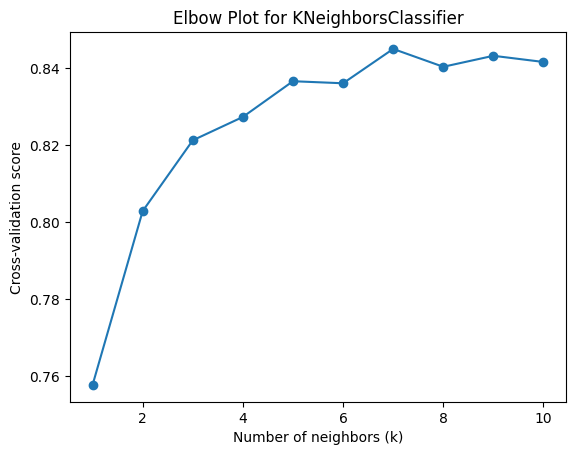

In [ ]:
scores = []

k_values = range(1, 11)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(score.mean())

plt.plot(k_values, scores, marker='o')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Cross-validation score')
plt.title('Elbow Plot for KNeighborsClassifier')
plt.show()

no clear elbow point

**ADA Boosting**

In [ ]:
np.random.seed(32)

ada_classifier = AdaBoostClassifier(random_state=32)

param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100, 120, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, cv=5, n_jobs=-1,scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.8678571428571429


In [ ]:
print("Adaboost algorithm fitted on og data\n")

ada_classifier_new = AdaBoostClassifier(n_estimators=50, learning_rate=0.01, algorithm='SAMME', random_state=32)

ada_classifier_new.fit(X_train, y_train)

y_pred_ada = ada_classifier_new.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred_ada) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_ada) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_ada, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_ada)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Adaboost algorithm fitted on og data

Accuracy score of this model:  86.86 %
Misclassification rate of this model:  13.14 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.889     0.940     0.914      1041
           1      0.793     0.660     0.720       359

    accuracy                          0.869      1400
   macro avg      0.841     0.800     0.817      1400
weighted avg      0.864     0.869     0.864      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  979 |                   62 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  122 |                  237 |
+-----------------+----------------------+----------------------+


In [ ]:
feature_importances = ada_classifier_new.feature_importances_

importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

                                    Feature  Importance
3                        delinquency_status         1.0
0                                       age         0.0
12  multiple_applications_short_time_period         0.0
20      time_between_account_open_and_trade         0.0
19                  days_since_recent_trade         0.0
18                       occupation_encoded         0.0
17                         location_encoded         0.0
16                      public_records_flag         0.0
15                 watchlist_blacklist_flag         0.0
14  applications_submitted_during_odd_hours         0.0
13               unusual_submission_pattern         0.0
11        new_accounts_opened_last_12months         0.0
1                              income_level         0.0
10             number_of_defaulted_accounts         0.0
9             number_of_delinquent_accounts         0.0
8                 avg_balance_last_12months         0.0
7                               max_balance     

**Gradient Boosting**

In [ ]:
np.random.seed(32)

gb_classifier = GradientBoostingClassifier(random_state=32)

param_grid = {
    'n_estimators': [50, 80, 100, 120, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, None],
}

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
Best Score: 0.8669642857142857


In [ ]:
print("Gradient boosting algorithm fitted on og data\n")

gb_classifier_new = GradientBoostingClassifier(n_estimators=50, learning_rate=0.05, max_depth = 3, random_state=32)
gb_classifier_new.fit(X_train, y_train)
y_pred_gb_classifier = gb_classifier_new.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred_gb_classifier)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_gb_classifier)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_gb_classifier, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_gb_classifier)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Gradient boosting algorithm fitted on og data

Accuracy score of this model:  86.79 %
Misclassification rate of this model:  13.21 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.889     0.939     0.914      1041
           1      0.790     0.660     0.719       359

    accuracy                          0.868      1400
   macro avg      0.840     0.800     0.816      1400
weighted avg      0.864     0.868     0.864      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  978 |                   63 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  122 |                  237 |
+-----------------+----------------------+----------------------+
Gradient boosting algorithm fit

In [ ]:
feature_importances = gb_classifier_new.feature_importances_

importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

                                    Feature    Importance
3                        delinquency_status  9.476468e-01
20      time_between_account_open_and_trade  8.317134e-03
11        new_accounts_opened_last_12months  6.175795e-03
16                      public_records_flag  4.990224e-03
8                 avg_balance_last_12months  4.663423e-03
7                               max_balance  3.846516e-03
19                  days_since_recent_trade  3.773946e-03
0                                       age  3.621519e-03
9             number_of_delinquent_accounts  3.301815e-03
17                         location_encoded  2.787092e-03
5                      debt_to_income_ratio  2.628912e-03
21                    credit_history_length  2.581943e-03
1                              income_level  2.392906e-03
2                                fico_score  1.911458e-03
18                       occupation_encoded  8.057269e-04
10             number_of_defaulted_accounts  3.518955e-04
4             

**Multilayer Perceptron**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',alpha=0.0001, max_iter=1000, random_state=32)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  81.57 %
Misclassification rate of this model:  18.43 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.854     0.908     0.880      1041
           1      0.672     0.549     0.604       359

    accuracy                          0.816      1400
   macro avg      0.763     0.728     0.742      1400
weighted avg      0.807     0.816     0.809      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  945 |                   96 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  162 |                  197 |
+-----------------+----------------------+----------------------+


**Naive Bias**

In [ ]:
np.random.seed(32)

nb_classifier = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'var_smoothing': 1e-09}
Best Score: 0.8514285714285714


In [ ]:
nb_classifier = grid_search.best_estimator_
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred_nb) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_nb) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_nb, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_nb)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  85.0 %
Misclassification rate of this model:  15.0 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.891     0.910     0.900      1041
           1      0.721     0.677     0.698       359

    accuracy                          0.850      1400
   macro avg      0.806     0.793     0.799      1400
weighted avg      0.847     0.850     0.848      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  947 |                   94 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  116 |                  243 |
+-----------------+----------------------+----------------------+


## Fitting models to SMOTE data

**Logistic regression w/SMOTE**

In [ ]:
lr = LogisticRegression(random_state=32)
result = lr.fit(X_resampled_train,y_resampled_train)
y_pred = lr.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  84.29 %
Misclassification rate of this model:  15.71 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.891     0.899     0.895      1041
           1      0.699     0.680     0.689       359

    accuracy                          0.843      1400
   macro avg      0.795     0.789     0.792      1400
weighted avg      0.841     0.843     0.842      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  936 |                  105 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  115 |                  244 |
+-----------------+----------------------+----------------------+


**Decision tree w/ SMOTE**

In [ ]:
dt = DecisionTreeClassifier(random_state=32)
param_grid = {
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1,scoring='accuracy')

grid_search.fit(X_resampled_train, y_resampled_train)

print(grid_search.best_params_)

print(grid_search.best_score_)

{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.7976774929726419


In [ ]:
print("Decision tree \n(fitted on data balanced using SMOTE)\n")

dtree = DecisionTreeClassifier(max_depth = 5,  min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt' , random_state = 32)
dtree.fit(X_resampled_train,y_resampled_train)
y_pred_dtree = dtree.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred_dtree)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_dtree)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_dtree, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_dtree)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Decision tree 
(fitted on data balanced using SMOTE)

Accuracy score of this model:  84.5 %
Misclassification rate of this model:  15.5 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.883     0.913     0.897      1041
           1      0.719     0.649     0.682       359

    accuracy                          0.845      1400
   macro avg      0.801     0.781     0.790      1400
weighted avg      0.841     0.845     0.842      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  950 |                   91 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  126 |                  233 |
+-----------------+----------------------+----------------------+


In [ ]:
feature_importances = dtree.feature_importances_

importance_df = pd.DataFrame({"Feature": X_resampled_train.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

                                    Feature  Importance
8                 avg_balance_last_12months    0.479116
3                        delinquency_status    0.229222
9             number_of_delinquent_accounts    0.153317
4             number_of_credit_applications    0.045925
7                               max_balance    0.030987
18                       occupation_encoded    0.013391
10             number_of_defaulted_accounts    0.009360
20      time_between_account_open_and_trade    0.008620
15                 watchlist_blacklist_flag    0.008493
11        new_accounts_opened_last_12months    0.005632
1                              income_level    0.003840
17                         location_encoded    0.003190
21                    credit_history_length    0.003145
19                  days_since_recent_trade    0.002701
13               unusual_submission_pattern    0.001760
5                      debt_to_income_ratio    0.001302
14  applications_submitted_during_odd_hours    0

**Random Forest w/ SMOTE**

In [ ]:
np.random.seed(32)

rf = RandomForestClassifier(random_state=32)
param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100, 150],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1,scoring='accuracy')

grid_search.fit(X_resampled_train, np.ravel(y_resampled_train))

print(grid_search.best_params_)

print(grid_search.best_score_)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 90}
0.8808121267517126


In [ ]:
print("Random forest \n(fitted on data balanced using SMOTE)\n")

rf = RandomForestClassifier(n_estimators=90, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=3, random_state=32)
rf.fit(X_resampled_train,y_resampled_train)
y_pred_rf = rf.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred_rf)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_rf)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_rf, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Random forest 
(fitted on data balanced using SMOTE)

Accuracy score of this model:  86.14 %
Misclassification rate of this model:  13.86 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.892     0.925     0.908      1041
           1      0.757     0.677     0.715       359

    accuracy                          0.861      1400
   macro avg      0.825     0.801     0.812      1400
weighted avg      0.858     0.861     0.859      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  963 |                   78 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  116 |                  243 |
+-----------------+----------------------+----------------------+


In [ ]:
feature_importances = rf.feature_importances_

importance_df = pd.DataFrame({"Feature": X_resampled_train.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

                                    Feature  Importance
3                        delinquency_status    0.161289
4             number_of_credit_applications    0.083223
8                 avg_balance_last_12months    0.081515
2                                fico_score    0.068181
9             number_of_delinquent_accounts    0.067512
7                               max_balance    0.062162
17                         location_encoded    0.059172
10             number_of_defaulted_accounts    0.050887
5                      debt_to_income_ratio    0.047625
19                  days_since_recent_trade    0.043471
20      time_between_account_open_and_trade    0.043054
21                    credit_history_length    0.042081
1                              income_level    0.041263
0                                       age    0.036074
11        new_accounts_opened_last_12months    0.035466
18                       occupation_encoded    0.035345
6                 payment_methods_high_risk    0

**Support Vector Machine w/ SMOTE**

In [ ]:
g = [0.0001, 0.001, 0.01, 0.1]
hist = []
for val in g:
    clf = SVC(gamma=val)
    cross_val = cross_val_score(clf, X_resampled_train, y_resampled_train, cv=5)
    hist.append(np.mean(cross_val))
plt.plot([str(i) for i in g], hist)
plt.title('Cross Validations score for SVC')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
print("Support vector machine \n(fitted on data balanced using SMOTE)\n")

svm_new = SVC(kernel= "linear",C=0.025, random_state = 0 , gamma=0.0001, probability=True)
svm_new.fit(X_resampled_train, y_resampled_train)
y_pred_svm = svm_new.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred_svm)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_svm)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_svm, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

In [ ]:
all_features_score = cross_val_score(svm_new, X_resampled_train, y_resampled_train, cv=5).mean()

for feature in X_resampled_train.columns:
    X_subset = X_resampled_train.drop(columns=[feature])
    subset_score = cross_val_score(svm_new, X_subset, y_resampled_train, cv=5).mean()
    feature_importance = all_features_score - subset_score
    print(feature)
    print(feature_importance)

**XGBoost w/ SMOTE**

In [ ]:
np.random.seed(32)

xgb_classifier = XGBClassifier(random_state=32)

param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100,120,150],
    'max_depth': [3, 4, 5, None],
    'gamma': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, n_jobs=-1,scoring='accuracy')
grid_search.fit(X_resampled_train, y_resampled_train)

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'gamma': 0.1, 'max_depth': None, 'n_estimators': 100}
Best Score: 0.8924308140309863


In [ ]:
print("XGBoost algorithm\n(fitted on data balanced using SMOTE)\n")

xgb_classifier = XGBClassifier(n_estimators=100, max_depth=None, gamma=0.1, random_state=32)
xgb_classifier.fit(X_resampled_train, y_resampled_train)
y_pred_xgb = xgb_classifier.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred_xgb) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_xgb) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_xgb, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_xgb)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

XGBoost algorithm
(fitted on data balanced using SMOTE)

Accuracy score of this model:  85.36 %
Misclassification rate of this model:  14.64 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.886     0.922     0.904      1041
           1      0.744     0.655     0.696       359

    accuracy                          0.854      1400
   macro avg      0.815     0.788     0.800      1400
weighted avg      0.849     0.854     0.850      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  960 |                   81 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  124 |                  235 |
+-----------------+----------------------+----------------------+


In [ ]:
feature_importances = xgb_classifier.feature_importances_

importance_df = pd.DataFrame({"Feature": X_resampled_train.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

                                    Feature  Importance
3                        delinquency_status    0.403766
17                         location_encoded    0.110223
11        new_accounts_opened_last_12months    0.041263
12  multiple_applications_short_time_period    0.039533
18                       occupation_encoded    0.036962
10             number_of_defaulted_accounts    0.032169
14  applications_submitted_during_odd_hours    0.030381
15                 watchlist_blacklist_flag    0.030267
16                      public_records_flag    0.028573
13               unusual_submission_pattern    0.026117
7                               max_balance    0.022812
0                                       age    0.022141
6                 payment_methods_high_risk    0.021596
20      time_between_account_open_and_trade    0.020495
8                 avg_balance_last_12months    0.020410
2                                fico_score    0.020202
19                  days_since_recent_trade    0

**KNN w/ SMOTE**

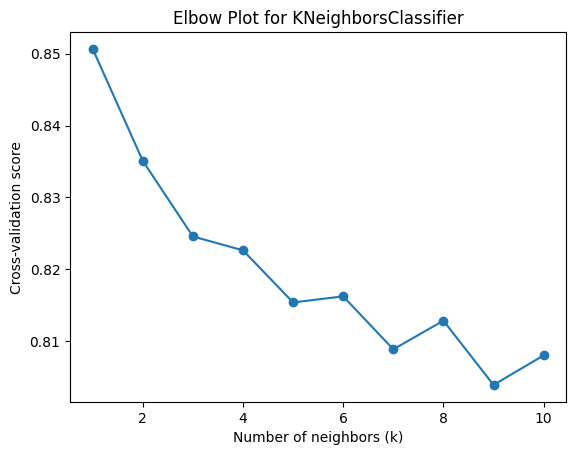

In [ ]:
scores = []

k_values = range(1, 11)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_resampled_train, y_resampled_train, cv=5)
    scores.append(score.mean())

plt.plot(k_values, scores, marker='o')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Cross-validation score')
plt.title('Elbow Plot for KNeighborsClassifier')
plt.show()

In [ ]:
np.random.seed(32)
print("k-Nearest Neighbours\n(fitted on data balanced using SMOTE)\n")

knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

probs = knn.predict_proba(X_test)
knn0_probs = probs[:, 0] #probabilities for class 0
knn1_probs = probs[:, 1] #probabilities for class 1

accuracy = round(metrics.accuracy_score(y_test, y_pred_knn)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_knn)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_knn, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

k-Nearest Neighbours
(fitted on data balanced using SMOTE)

Accuracy score of this model:  85.36 %
Misclassification rate of this model:  14.64 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.868     0.947     0.906      1041
           1      0.792     0.582     0.671       359

    accuracy                          0.854      1400
   macro avg      0.830     0.765     0.788      1400
weighted avg      0.848     0.854     0.846      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  986 |                   55 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  150 |                  209 |
+-----------------+----------------------+----------------------+


In [ ]:
#feature importances
all_features_score = cross_val_score(knn, X_resampled_train, y_resampled_train, cv=5).mean()

for feature in X_resampled_train.columns:
    X_subset = X_resampled_train.drop(columns=[feature])
    subset_score = cross_val_score(knn, X_subset, y_resampled_train, cv=5).mean()
    feature_importance = all_features_score - subset_score
    print(feature)
    print(feature_importance)

age
0.0
income_level
0.010529391860715664
fico_score
-7.323979123174951e-08
delinquency_status
-0.00012106537530254258
number_of_credit_applications
0.0
debt_to_income_ratio
0.0
payment_methods_high_risk
0.0
max_balance
0.07671846184719555
avg_balance_last_12months
0.11241685452673189
number_of_delinquent_accounts
-7.323979123174951e-08
number_of_defaulted_accounts
0.0
new_accounts_opened_last_12months
0.0
multiple_applications_short_time_period
0.0
unusual_submission_pattern
0.0
applications_submitted_during_odd_hours
0.0
watchlist_blacklist_flag
0.0
public_records_flag
0.0
location_encoded
0.0
occupation_encoded
0.0
days_since_recent_trade
-0.0003630496463250532
time_between_account_open_and_trade
-0.0029037380124768974
credit_history_length
-0.0007260260528585416


**ADA Boosting w/ SMOTE**

In [ ]:
np.random.seed(32)

ada_classifier = AdaBoostClassifier(random_state=32)

param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100, 120, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, cv=5, n_jobs=-1,scoring='accuracy')

grid_search.fit(X_resampled_train, np.ravel(y_resampled_train))

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 150}
Best Score: 0.8707697795042837


In [ ]:
print("Adaboost algorithm\n(fitted on data balanced using SMOTE)\n w/ NEW PARAMETERS\n")

ada_classifier = AdaBoostClassifier(n_estimators=150, learning_rate=1.0, algorithm='SAMME', random_state=32)
ada_classifier.fit(X_resampled_train, y_resampled_train)
y_pred_ada = ada_classifier.predict(X_test)

probs = ada_classifier.predict_proba(X_test)
ada0_probs = probs[:, 0]
ada1_probs = probs[:, 1]

accuracy = round(metrics.accuracy_score(y_test, y_pred_ada) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_ada) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_ada, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_ada)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Adaboost algorithm
(fitted on data balanced using SMOTE)
 w/ NEW PARAMETERS

Accuracy score of this model:  86.5 %
Misclassification rate of this model:  13.5 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.892     0.931     0.911      1041
           1      0.771     0.674     0.719       359

    accuracy                          0.865      1400
   macro avg      0.831     0.802     0.815      1400
weighted avg      0.861     0.865     0.862      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  969 |                   72 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  117 |                  242 |
+-----------------+----------------------+----------------------+


In [ ]:
#feature importances
feature_importances = ada_classifier.feature_importances_

importance_df = pd.DataFrame({"Feature": X_resampled_train.columns, "Importance": feature_importances})
importance_df_best_model = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

                                    Feature  Importance
0                                       age    0.004374
1                              income_level    0.035402
2                                fico_score    0.006438
3                        delinquency_status    0.159512
4             number_of_credit_applications    0.000000
5                      debt_to_income_ratio    0.000000
6                 payment_methods_high_risk    0.004514
7                               max_balance    0.050052
8                 avg_balance_last_12months    0.007660
9             number_of_delinquent_accounts    0.003548
10             number_of_defaulted_accounts    0.013613
11        new_accounts_opened_last_12months    0.019905
12  multiple_applications_short_time_period    0.018128
13               unusual_submission_pattern    0.009094
14  applications_submitted_during_odd_hours    0.010210
15                 watchlist_blacklist_flag    0.013804
16                      public_records_flag    0

**Gradient boosting w/ SMOTE**

In [ ]:
np.random.seed(32)

gb_classifier = GradientBoostingClassifier(random_state=32)

param_grid = {
    'n_estimators': [50, 80, 100, 120, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, None],
}

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, n_jobs=-1,scoring='accuracy')
grid_search.fit(X_resampled_train, np.ravel(y_resampled_train))

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Best Score: 0.8895272224980921


In [ ]:
print("Gradient boosting algorithm\n(fitted on data balanced using SMOTE)\n")

gb_classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth = 4, random_state=32)
gb_classifier.fit(X_resampled_train, y_resampled_train)
y_pred_gb_classifier = gb_classifier.predict(X_test)

probs = gb_classifier.predict_proba(X_test)
gb0_probs = probs[:, 0]
gb1_probs = probs[:, 1]

accuracy = round(metrics.accuracy_score(y_test, y_pred_gb_classifier)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_gb_classifier)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_gb_classifier, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_gb_classifier)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Gradient boosting algorithm
(fitted on data balanced using SMOTE)

Accuracy score of this model:  86.07 %
Misclassification rate of this model:  13.93 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.886     0.933     0.909      1041
           1      0.770     0.652     0.706       359

    accuracy                          0.861      1400
   macro avg      0.828     0.792     0.807      1400
weighted avg      0.856     0.861     0.857      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  971 |                   70 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  125 |                  234 |
+-----------------+----------------------+----------------------+


In [ ]:
#feature importances
feature_importances = gb_classifier.feature_importances_

importance_df = pd.DataFrame({"Feature": X_resampled_train.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

                                    Feature  Importance
3                        delinquency_status    0.597680
17                         location_encoded    0.187066
18                       occupation_encoded    0.022054
7                               max_balance    0.021653
20      time_between_account_open_and_trade    0.020877
11        new_accounts_opened_last_12months    0.018131
1                              income_level    0.017861
21                    credit_history_length    0.016432
19                  days_since_recent_trade    0.015751
8                 avg_balance_last_12months    0.015666
5                      debt_to_income_ratio    0.013277
9             number_of_delinquent_accounts    0.011333
2                                fico_score    0.010571
0                                       age    0.009424
12  multiple_applications_short_time_period    0.004611
10             number_of_defaulted_accounts    0.003663
4             number_of_credit_applications    0

**MLP w/SMOTE**

In [ ]:
scaler = StandardScaler()
X_resampled_train_scaled = scaler.fit_transform(X_resampled_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',alpha=0.0001, max_iter=1000, random_state=32)
mlp.fit(X_resampled_train_scaled, y_resampled_train)
y_pred = mlp.predict(X_test_scaled)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  73.71 %
Misclassification rate of this model:  26.29 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.851     0.784     0.816      1041
           1      0.490     0.602     0.540       359

    accuracy                          0.737      1400
   macro avg      0.670     0.693     0.678      1400
weighted avg      0.758     0.737     0.745      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  816 |                  225 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  143 |                  216 |
+-----------------+----------------------+----------------------+


**Naive Bayes w/SMOTE**

In [ ]:
np.random.seed(32)

nb_classifier = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_resampled_train, y_resampled_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'var_smoothing': 1.2328467394420635e-09}
Best Score: 0.791384510370022


In [ ]:
nb_classifier = grid_search.best_estimator_
nb_classifier.fit(X_resampled_train, y_resampled_train)

y_pred_nb = nb_classifier.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred_nb) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_nb) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_nb, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_nb)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  84.14 %
Misclassification rate of this model:  15.86 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.895     0.891     0.893      1041
           1      0.689     0.696     0.693       359

    accuracy                          0.841      1400
   macro avg      0.792     0.794     0.793      1400
weighted avg      0.842     0.841     0.842      1400

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  928 |                  113 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  109 |                  250 |
+-----------------+----------------------+----------------------+
